In [2]:
## Assessment

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt


In [3]:
# Exploring the movies.csv data

data = pd.read_csv("C:/Users/rahul/Downloads/Data/movie.csv")
data.shape

(27278, 3)

In [4]:
# Print the first 5 entries in the data movie.csv 
data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
# An insight into the dataset's properties
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
movieId    27278 non-null int64
title      27278 non-null object
genres     27278 non-null object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB


In [6]:
# Checking for Unique entries in the data

movies = data['movieId'].unique().tolist()
len(movies)

27278

In [9]:
# Exploring the ratings.csv data

ratings = pd.read_csv("C:/Users/rahul/Downloads/Data/rating.csv", sep = ',')
ratings.shape

(20000263, 4)

In [13]:
# Summarizing the ratings data

ratings.describe(include = 'all')

,userId,movieId,rating,timestamp
count,2.000026e+07,2.000026e+07,2.000026e+07,20000263
unique,NaN,NaN,NaN,15351121
top,NaN,NaN,NaN,1996-03-01 00:00:00
freq,NaN,NaN,NaN,643
mean,6.904587e+04,9.041567e+03,3.525529e+00,NaN
std,4.003863e+04,1.978948e+04,1.051989e+00,NaN
min,1.000000e+00,1.000000e+00,5.000000e-01,NaN
25%,3.439500e+04,9.020000e+02,3.000000e+00,NaN
50%,6.914100e+04,2.167000e+03,3.500000e+00,NaN
75%,1.036370e+05,4.770000e+03,4.000000e+00,NaN


In [17]:
# The minimum and maximum ratings given to movies

print(f"The minimum rating: {ratings['rating'].min()}")
print(f"The maximum rating: {ratings['rating'].max()}")

The minimum rating: 0.5
The maximum rating: 5.0


In [18]:
##### Data Cleaning #####

## The movies data

data.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [20]:
##### Data Cleaning #####

## The ratings data

ratings.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

In [24]:
## Now the tags data

tagsdata = pd.read_csv("C:/Users/rahul/Downloads/Data/tag.csv")
tagsdata.shape

(465564, 4)

In [25]:
## Handling the null values

tagsdata.isnull().any()

userId       False
movieId      False
tag           True
timestamp    False
dtype: bool

In [26]:
# We find that the tag attribute has null values in the records. Also, there are 
# only a few null values, which won't affect our analysis.
# Since we can't replace the values of tag with any statistical measure like 
# mean, median, or mode, we have to remove the null values

tagsdata.isnull().sum()

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

In [31]:
tagsdata.dropna(inplace = True)

In [33]:
## The number of unique tags in the tags data

uniquetags = tagsdata['tag'].unique().tolist()
len(uniquetags)

38643

In [34]:
# filtering to get the list of drama movies from the movies data
dramamovies=data['genres'].str.contains('Drama')
data[dramamovies].head()

,movieId,title,genres
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
10,11,"American President, The (1995)",Comedy|Drama|Romance
13,14,Nixon (1995),Drama
15,16,Casino (1995),Crime|Drama
16,17,Sense and Sensibility (1995),Drama|Romance


In [37]:
# Total number of Drama movies
dramamovies.shape

(27278,)

In [35]:
#filtering to get the list of comedy movies
comedymovies = data['genres'].str.contains('Comedy')
data[comedymovies].head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
6,7,Sabrina (1995),Comedy|Romance


In [36]:
# Total number of comedy movies
comedymovies.shape

(27278,)

In [38]:
#search movie id by tag search
tagsearch = tagsdata['tag'].str.contains('dark')
tagsdata[tagsearch].head()

,userId,movieId,tag,timestamp
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
4,65,592,dark hero,2013-05-10 01:41:18
21,65,6874,dark hero,2013-05-10 01:41:19
51,121,778,dark comedy,2011-03-23 04:00:46


In [42]:
del ratings['timestamp']

In [43]:
#merging two dataframes "movies.csv" and "ratings.csv"
# Performing inner join on movies data and ratings data
moviedataratings=data.merge(ratings,on = 'movieId',how = 'inner')
moviedataratings.head(5)

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5


In [45]:
# displays high rated movies from the combined datasets

highrated= moviedataratings['rating']>4.0
moviedataratings[highrated].head(10)

,movieId,title,genres,userId,rating
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.5
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,5.0
14,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,34,5.0
15,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,39,5.0
19,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,58,5.0
20,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,59,4.5
24,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,82,5.0
25,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,84,5.0


In [46]:
# displays low rated movies from the combined datasets

lowrated = moviedataratings['rating']<4.0
moviedataratings[lowrated].head()

,movieId,title,genres,userId,rating
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,16,3.0
10,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,22,3.0
13,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,31,3.0
16,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,47,1.0
23,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,80,3.0


In [47]:
#total number of unique movie genres in the data

uniquegenres = data['genres'].unique().tolist()
len(uniquegenres)

1342

In [48]:
## The 25 Top-rated movies in the data

mostrated = moviedataratings.groupby('title').size().sort_values(ascending=False)[:25]
mostrated.head(25)

title
Pulp Fiction (1994)                                                               67310
Forrest Gump (1994)                                                               66172
Shawshank Redemption, The (1994)                                                  63366
Silence of the Lambs, The (1991)                                                  63299
Jurassic Park (1993)                                                              59715
Star Wars: Episode IV - A New Hope (1977)                                         54502
Braveheart (1995)                                                                 53769
Terminator 2: Judgment Day (1991)                                                 52244
Matrix, The (1999)                                                                51334
Schindler's List (1993)                                                           50054
Toy Story (1995)                                                                  49695
Fugitive, The (1993)      

In [49]:
# Extracting the year from the title attribute in the data

data['year'] =data['title'].str.extract('.*\((.*)\).*',expand = False)
data.head(5)

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [50]:
#define a function that counts the number of times each genre appear:

def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue
        for s in liste_keywords: 
            if pd.notnull(s): keyword_count[s] += 1
    # convert the dictionary in a list to sort the keywords  by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [51]:
#here we  make census of the genres:
genre_labels = set()
for s in data['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

In [52]:
#counting how many times each of genres occur:
keyword_occurences, dum = count_word(data, 'genres', genre_labels)
keyword_occurences

[['Drama', 13344],
 ['Comedy', 8374],
 ['Thriller', 4178],
 ['Romance', 4127],
 ['Action', 3520],
 ['Crime', 2939],
 ['Horror', 2611],
 ['Documentary', 2471],
 ['Adventure', 2329],
 ['Sci-Fi', 1743],
 ['Mystery', 1514],
 ['Fantasy', 1412],
 ['War', 1194],
 ['Children', 1139],
 ['Musical', 1036],
 ['Animation', 1027],
 ['Western', 676],
 ['Film-Noir', 330],
 ['(no genres listed)', 246],
 ['IMAX', 196]]

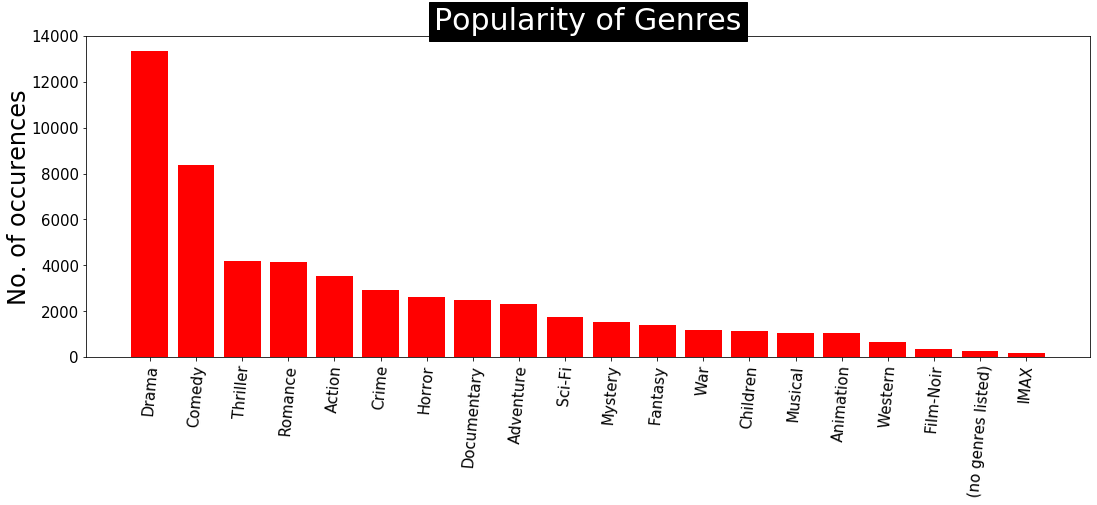

In [54]:
# Histogram to check the frequency of each genre (also can be determined as popularity)

trunc_occurences = keyword_occurences[0:50]
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [i[1] for i in trunc_occurences]
x_axis = [k for k,i in enumerate(trunc_occurences)]
x_label = [i[0] for i in trunc_occurences]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Popularity of Genres",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()

In [55]:
moviedataratings

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5
...,...,...,...,...,...
20000258,131254,Kein Bund für's Leben (2007),Comedy,79570,4.0
20000259,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,79570,4.0
20000260,131258,The Pirates (2014),Adventure,28906,2.5
20000261,131260,Rentun Ruusu (2001),(no genres listed),65409,3.0


In [62]:
moviedataratings

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5
...,...,...,...,...,...
20000258,131254,Kein Bund für's Leben (2007),Comedy,79570,4.0
20000259,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,79570,4.0
20000260,131258,The Pirates (2014),Adventure,28906,2.5
20000261,131260,Rentun Ruusu (2001),(no genres listed),65409,3.0


In [64]:
ratings

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5
...,...,...,...
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0


In [129]:
column_names = ['user_id', 'movieId', 'rating', 'timestamp']
df = pd.read_csv("C:/Users/rahul/Downloads/Data/ml-100k/u.data", sep = '\t', names = column_names)
df.shape

(100000, 4)

In [130]:
data = pd.read_csv("C:/Users/rahul/Downloads/Data/movie.csv")
data.shape

(27278, 3)

In [131]:
data.drop(['genres'], axis=1, inplace = True)

In [132]:
df = pd.merge(df, data, on = 'movieId')

In [133]:
df.head()

,user_id,movieId,rating,timestamp,title
0,196,242,3,881250949,Farinelli: il castrato (1994)
1,63,242,3,875747190,Farinelli: il castrato (1994)
2,226,242,5,883888671,Farinelli: il castrato (1994)
3,154,242,3,879138235,Farinelli: il castrato (1994)
4,306,242,5,876503793,Farinelli: il castrato (1994)


In [134]:
# Unique users and Unique movies 

n_users = df.user_id.nunique()
n_items = df.movieId.nunique()

print(f"Number of unique users: {n_users}")
print(f"Number of unique movies: {n_items}")

Number of unique users: 943
Number of unique movies: 1626


In [146]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.25)

In [142]:
train_data.user_id.nunique()

943

In [ ]:
train_data_matrix = np.zeros((n_users, n_items))
for line in train_data.itertuples():
    train_data_matrix[line[1]-1, line[2]-1] = line[3]

test_data_matrix = np.zeros((n_users, n_items))
for line in test_data.itertuples():
    test_data_matrix[line[1]-1, line[2]-1] = line[3]

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

user_similarity = pairwise_distances(train_data_matrix, metrics = 'cosine')
movie_similarity = pairwise_distances(train_data_matrix.T, metrics = 'cosine')

In [ ]:
def predict(ratings, similarity, type = 'user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis = 1)
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff)/np.array([np.abs(similarity).sum(axis = 1)]).T
    elif type = 'movie':
        pred = ratings.dot(similarity)/np.array([np.abs(similarity).sum(axis = 1)])
    return pred

In [ ]:
movie_prediction = predict(train_data_matrix, movie_similarity, type = 'item')
user_prediction = predict(train_data_matrix, user_similarity, type = 'user')

In [148]:
# The sparsity level of the Movie Lens dataset is:

sparsity = round(1.0-len(df)/float(n_users*n_items), 3)
print(f"The sparsity level of the MovieLens data is: {str(sparsity*100)}%")

The sparsity level of the MovieLens data is: 93.60000000000001%
